<a href="https://colab.research.google.com/github/mgfrantz/CodingNomads-Intro-To-Deep-Learning/blob/master/Fundamentals/Our%20first%20neural%20network%20-%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
def seed_all(seed=42):
    """
    Sets the numpy and torch random seed.
    """
    np.random.seed(seed)
    torch.random.seed = seed

seed_all()

# Single-Variable Linear Regression

In [ ]:
# Create some X data
X = np.random.uniform(0, 10, 100)

In [ ]:
# Define the slope (m), bias (b), and some noise we want to add to X to make y
m = 3
b = 1.8
noise = np.random.normal(scale=3, size=100) # add this so we don't have a perfect line relationship

### Exercise 2.1: Create your `y` variable

In the cell above, we've created the slope `m`, the intercept `b`, and a noise factor `noise`.
In the cell below, use multiplication and addition to create your `y` variable.

In [ ]:
# Your code here
y = m*X+b+noise

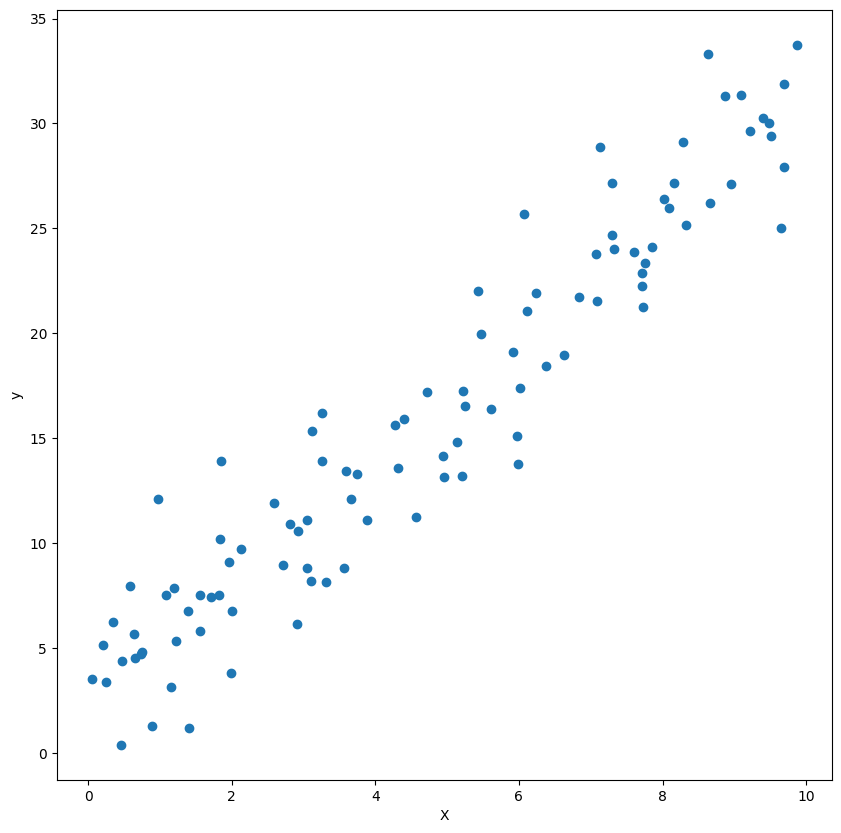

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)

### Exercise 2.2: Create a function that returns MSE

Look at some of the functions in `torch`.
Based on what you've learned in the lesson, create a function that returns the mean squared error for a `torch.Tensor` of `predictions` and `actuals`.
There is a test case below so you can understand what the inputs and outputs should be.

In [ ]:
# Define MSE
def mse(predictions:torch.Tensor, actuals:torch.Tensor) -> torch.Tensor:
    return torch.square(predictions - actuals).mean()

In [ ]:
ys = torch.tensor([1,2,3])
yhats = torch.tensor([1.1, 2.1, 3.1])

In [ ]:
#assert mse(ys,yhats)==0.01  #This doesn`t work, it`s due to the numerical inestability Check that 0.00999989 (numpy)

In [ ]:
print(mse(ys,yhats))
print(mse(ys,yhats).numpy())

tensor(0.0100)
0.009999989


In [ ]:
assert isinstance(mse(ys, yhats), torch.Tensor), "The output of mse should be a torch.Tensor!"
assert torch.allclose(mse(ys, yhats), torch.tensor(0.01)), "The MSE should be about 0.01" #This fixes the numerical inestability

In [ ]:
mse(ys, yhats)

tensor(0.0100)

In [ ]:
# Now that we've defined MSE, let's just use Torch's.
mse_loss = nn.MSELoss()
mse_loss(ys, yhats)

tensor(0.0100)

In [ ]:
# We can also use the functional API to calculate MSE
F.mse_loss(ys, yhats)

tensor(0.0100)

### Exercise 2.3: Based on your knowledge of `scikit-learn`, perform a linear regression to predict `y` from `X`.

Fill in the code to fit a linear regression model and find the coefficient(s) and intercept/bias.
Are your slope and intercept in the ballpark of the sope and intercept we defined earlier in the notebook?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Fit a linear model on our data
lr = LinearRegression().fit(np.expand_dims(X,1),y)# we need to expand the dimension of X because it`s a vector a scikit learn doesn`t distinguish

In [ ]:
print(np.expand_dims(X,1))

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]
 [9.69584628]
 [7.75132823]
 [9.39498942]
 [8.9482735 ]
 [5.97899979]
 [9.21874235]
 [0.88492502]
 [1.95982862]
 [0.45227289]
 [3.25330331]
 [3.8867729 ]
 [2.71349032]
 [8.28737509]
 [3.56753327]
 [2.8093451 ]
 [5.42696083]
 [1.40924225]
 [8.02196981]
 [0.74550644]
 [9.86886937]
 [7.72244769]
 [1.98

In [ ]:
# Display the slope and intercept
slope = lr.coef_# Your code here
intercept = lr.intercept_ # Your code here

assert isinstance(slope, np.ndarray)
assert isinstance(intercept, float)

print(f'The slope is {str(slope)} and the intercept is {intercept}')

The slope is [2.86206803] and the intercept is 2.4452884726402466


In [ ]:
assert isinstance(intercept, float)

In [ ]:
# Calculate the mean squared error
predictions = lr.predict(X.reshape(-1,1))   # I need to reshape it to work with scikit learn
lr_mse = mean_squared_error(y, predictions)

print(f'The mean squared error from our linear regression is {lr_mse}')

The mean squared error from our linear regression is 7.259261075703482


In [ ]:
print(X.reshape(-1,1))

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]
 [9.69584628]
 [7.75132823]
 [9.39498942]
 [8.9482735 ]
 [5.97899979]
 [9.21874235]
 [0.88492502]
 [1.95982862]
 [0.45227289]
 [3.25330331]
 [3.8867729 ]
 [2.71349032]
 [8.28737509]
 [3.56753327]
 [2.8093451 ]
 [5.42696083]
 [1.40924225]
 [8.02196981]
 [0.74550644]
 [9.86886937]
 [7.72244769]
 [1.98

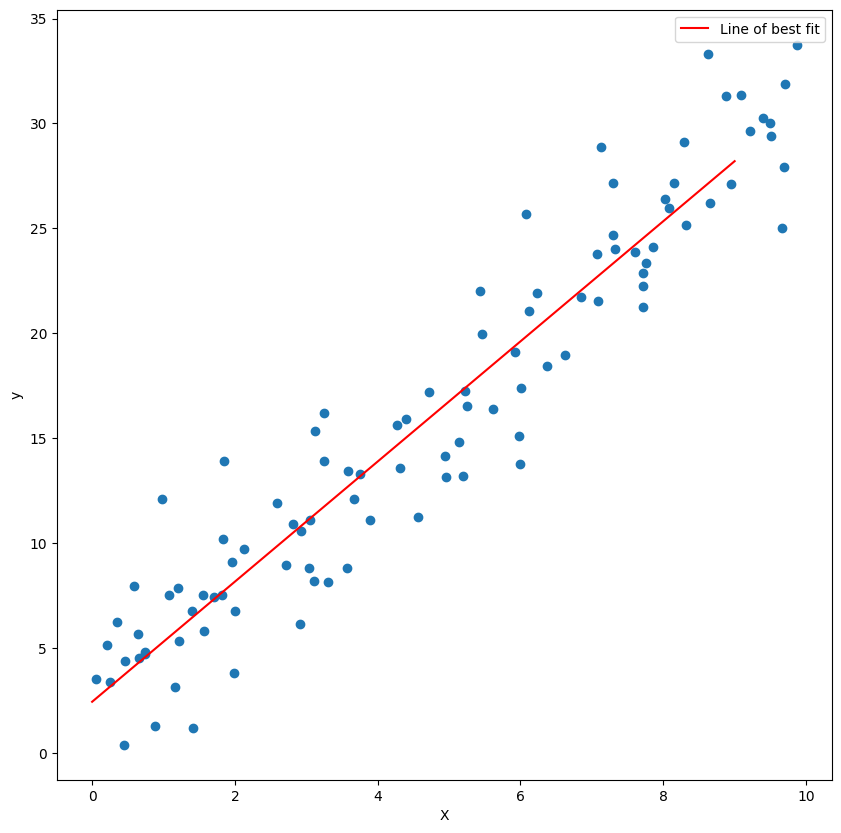

In [ ]:
# Plot our line of best fit
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
_x = np.arange(0, 10)
_y = _x * lr.coef_[0] + lr.intercept_
ax.plot(_x, _y, c='red', label=f"Line of best fit")
ax.legend()

In [ ]:
# Because we're in torch now, let's just turn X and y into tensors.
X = torch.tensor(X)
y = torch.tensor(y)

## Exercise 2.4: Complete the `forward` method

Based on your knowledge of single-variable linear models and object-oriented programming, complete the `forward` method in the `LinReg` class.
This method should take the input X, multiply it by the `slope` class attribute, and add the `bias` class attribute.

In [ ]:
# Build our linear regression model
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        # Randomly initialize 2 parameters, one for our slope and one for our bias.
        self.slope = nn.Parameter(torch.rand(1))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, X):
        return self.slope*X+self.bias

In [ ]:
lr = LinReg()

## Exercise 2.5: Modifying the learning rate and number of epochs

Change the number of epochs `N_EPOCHS` and learning rate `LR` variables.
What do you observe about the loss over time and  when the learning rate becomes too large or too small?

In [ ]:
N_EPOCHS = 300    #Number of iterations
LR = 1e-3     #Learning rate

In [ ]:
slopes = []
biases = []
losses = []
_alphas = []                            #This is for visualization
for i in range(N_EPOCHS):
    # Make some inferences
    yhat = lr(X)
    # Measure how bad those guesses were
    loss = F.mse_loss(yhat, y)                           #Torch functional API
    if i%(N_EPOCHS/10)==0:                                #Every 10% of the training duration we print Epoch and training loss
        print(f"Epoch {i} Train Loss: {loss:.04f}")
    # Calculate the gradient of all the parameters with respect to the loss
    loss.backward()

    # Apply the SGD update rule  (Stochastic gradient descent)
    #lr.slope=m
    #data = tensor that populates m(our slope)
    #sub_=inplace operation, it`s a substraction(=lr.slope.data=lr.slope.data-lr.slope.grad*LR)
    # Apply the SGD update rule  (Stochastic gradient descent)
    lr.slope.data.sub_(lr.slope.grad * LR)
    lr.bias.data.sub_(lr.bias.grad * LR)
    # Zero out the gradients for the next round
    lr.slope.grad.zero_()   #refresh for next round to 0. Reset it. we don`t want to add data to loss.backward()
    lr.bias.grad.zero_()

    # Record the parameters and losses so we can plot them out later
    slopes.append(float(lr.slope.data.detach().numpy()))      #detaches the gradients from the data, convert it to numpy array and append it to slope.
    biases.append(float(lr.bias.data.detach().numpy()))
    losses.append(float(loss.detach().numpy()))
    _alphas.append(i/N_EPOCHS)

Epoch 0 Train Loss: 183.2567
Epoch 30 Train Loss: 11.2571
Epoch 60 Train Loss: 7.8146
Epoch 90 Train Loss: 7.7304
Epoch 120 Train Loss: 7.7137
Epoch 150 Train Loss: 7.6988
Epoch 180 Train Loss: 7.6844
Epoch 210 Train Loss: 7.6705
Epoch 240 Train Loss: 7.6570
Epoch 270 Train Loss: 7.6440


In [ ]:
lr.slope, lr.bias

(Parameter containing:
 tensor([3.0380], requires_grad=True),
 Parameter containing:
 tensor([1.3004], requires_grad=True))

Let's plot what we've done so far.
The blue dots represent the data, and the red lines represent the functions created by our slopes and biases as the model learns.
The more transparent lines are the first iterations in our training loop.
Notice that as the lines get more solid, they fit the data better.
This illustrates the process of our model learning the data!

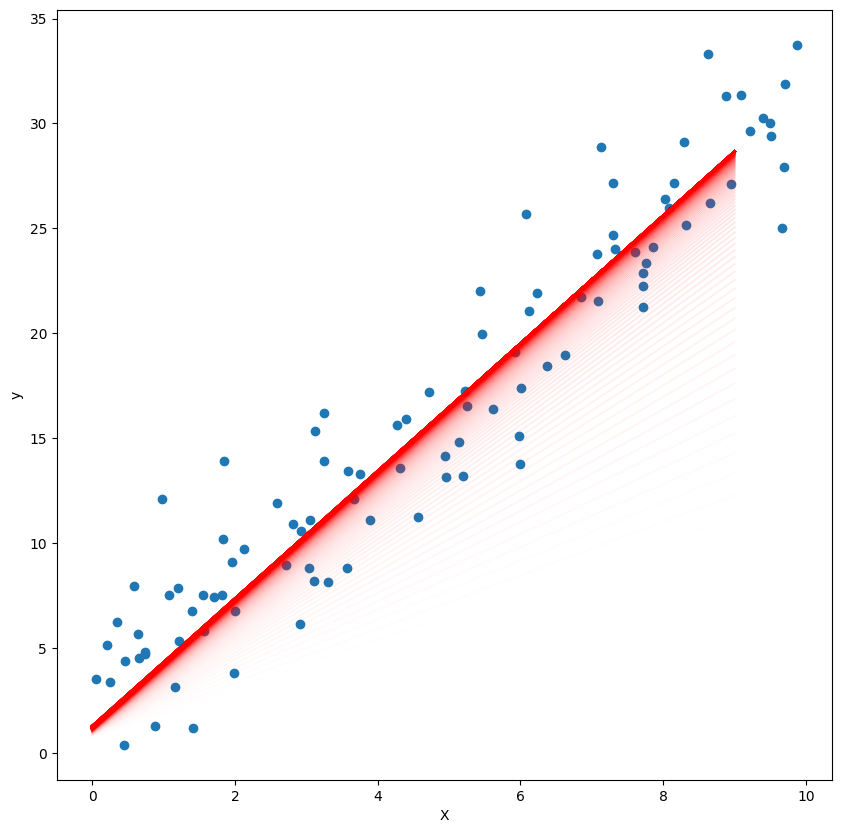

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
for s, b, a in zip(slopes, biases, _alphas):
    _x = np.arange(0, 10)
    _y = _x * s + b
    ax.plot(_x, _y, alpha=a, c='red', label=f"Epoch {int(a)}")


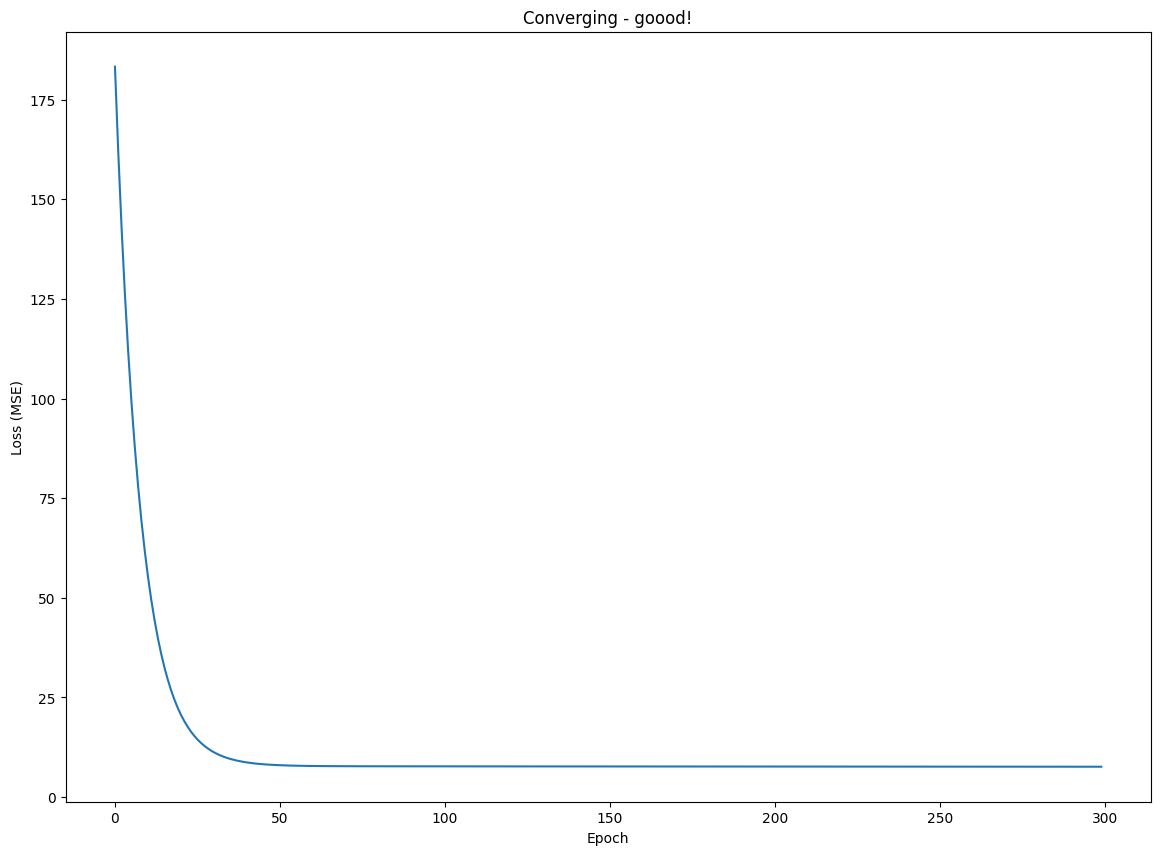

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
if (losses[-1] > losses[0]) | np.isnan(losses[-1]):
    ax.set_title('Diverging - BAD!')
else:
    ax.set_title('Converging - goood!')

<!-- split -->

# Multi-varable linear regression

In [ ]:
# Make yet another fake dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=3, n_informative=2, bias=3, noise=2)

#n_informative is the number of variables used to build the model. Later important to choose the weights


In [ ]:
X.shape #1000 filas y 3 columnas mientras que y tiene 1000 filas y una columna

(1000, 3)

In [ ]:
y.shape

(1000,)

In [ ]:
# No more bad habits, we need to split our data.
X_train, X_valid, y_train, y_valid = (torch.tensor(i).float() for i in train_test_split(X, y, test_size=0.1, random_state=42))

In [ ]:
X_train.shape  #(already splited in 90% train and 10% test)

torch.Size([900, 3])

## Exercise 2.6: Create `weights` and `bias` tensors

In the cell below, create a `weights` tensor and a `bias` tensor.
For both of these tensors, use the [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html) function.
The `weights` tensor should have as many values as `X_train` has features.
The `bias` tensor should just be a single random value.

Once you've created these tensors, turn them into parameters using the [`nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html) class.
If you need a reference here, look at how this was done when we created the `LinReg` class in Exercise 2.4.

In [ ]:
# Let's create some temporary weights and biases and test out our matrix operations before we build our model.
# Create a weights parameter with 1 beta per column in X
weights = nn.Parameter(torch.rand(X_train.shape[1]))
#Number of columns=3, defined by the  make_regression( n_features=3)
#It will pick up random numbers from 0 to 1 (torch.rand) and then use it in nn.Parameter

# Create our bias parameter
bias = nn.Parameter(torch.rand(1))

In [ ]:
# Test out the operation we want to perform in the forward pass
torch.matmul(X_train[:10], weights) + bias      #Matrix multiplication (matmul)10 first raws of X_train*weights+bias
                                                #This is our forward method

tensor([-1.1479, -0.7301,  0.2666,  0.1889, -0.4752, -0.5628,  0.9209, -0.1136,
         0.6438,  1.6041], grad_fn=<AddBackward0>)

In [ ]:
# FYI: @ does the same thing as matmul in this context and is easier
X_train[:10]@weights + bias   #another way to do the same as matmul

tensor([-1.1479, -0.7301,  0.2666,  0.1889, -0.4752, -0.5628,  0.9209, -0.1136,
         0.6438,  1.6041], grad_fn=<AddBackward0>)

In [ ]:
# Sanity check: different implementations of our forward pass are the same
#Check if those 2 were the same
assert (X_train@weights + bias == torch.matmul(X_train, weights) + bias).all()

In [ ]:
# Let's make our model
class LinRegMulti(nn.Module):
    def __init__(self, n_cols):
        super().__init__()
        self.n_cols = n_cols

        self.weights = nn.Parameter(torch.rand(self.n_cols))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, X):
        return X@self.weights.T + self.bias   #transpose the x@self.weights
        #The transpose of a vector changes a column vector to a row vector, or vice versa:
        #X=[[1,2,3],        self.weights=[[1,2,3],
          #  [4,5,6]]                     [4,5,6,]] #that`s why we need to transpose



In [ ]:
N_EPOCHS = 10000
LR = 1e-3

In [ ]:
lrm = LinRegMulti(X_train.shape[1])

In [ ]:
# Instead of updating each parameter individually, let's make an update rule function.
def gd_update_rule(parameters, lr):
    parameters.data.sub_(parameters.grad * lr)
    parameters.grad.zero_()

In [ ]:
train_losses = []
valid_losses = []

In [ ]:
for i in range(N_EPOCHS):
    yhat = lrm(X_train)
    loss = mse(yhat, y_train)
    loss.backward()
    for p in lrm.parameters():
        gd_update_rule(p, LR)                   #calling the function to update each parameter
    train_losses.append(loss.detach().numpy())

    with torch.no_grad():     #this is for the validation loss
        yhat = lrm(X_valid)
        valid_loss = mse(yhat, y_valid)
        valid_losses.append(valid_loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train Loss: {loss:.04f}, Valid Loss: {valid_loss:.04f}")

<ipython-input-89-bdddfe61c5fe>:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  return X@self.weights.T + self.bias   #transpose the x@self.weights


Epoch 0 Train Loss: 2083.3691, Valid Loss: 2521.1172
Epoch 1000 Train Loss: 54.1051, Valid Loss: 65.7383
Epoch 2000 Train Loss: 5.3867, Valid Loss: 5.9886
Epoch 3000 Train Loss: 4.1698, Valid Loss: 4.2609
Epoch 4000 Train Loss: 4.1385, Valid Loss: 4.1795
Epoch 5000 Train Loss: 4.1377, Valid Loss: 4.1720
Epoch 6000 Train Loss: 4.1377, Valid Loss: 4.1711
Epoch 7000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 8000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 9000 Train Loss: 4.1377, Valid Loss: 4.1712


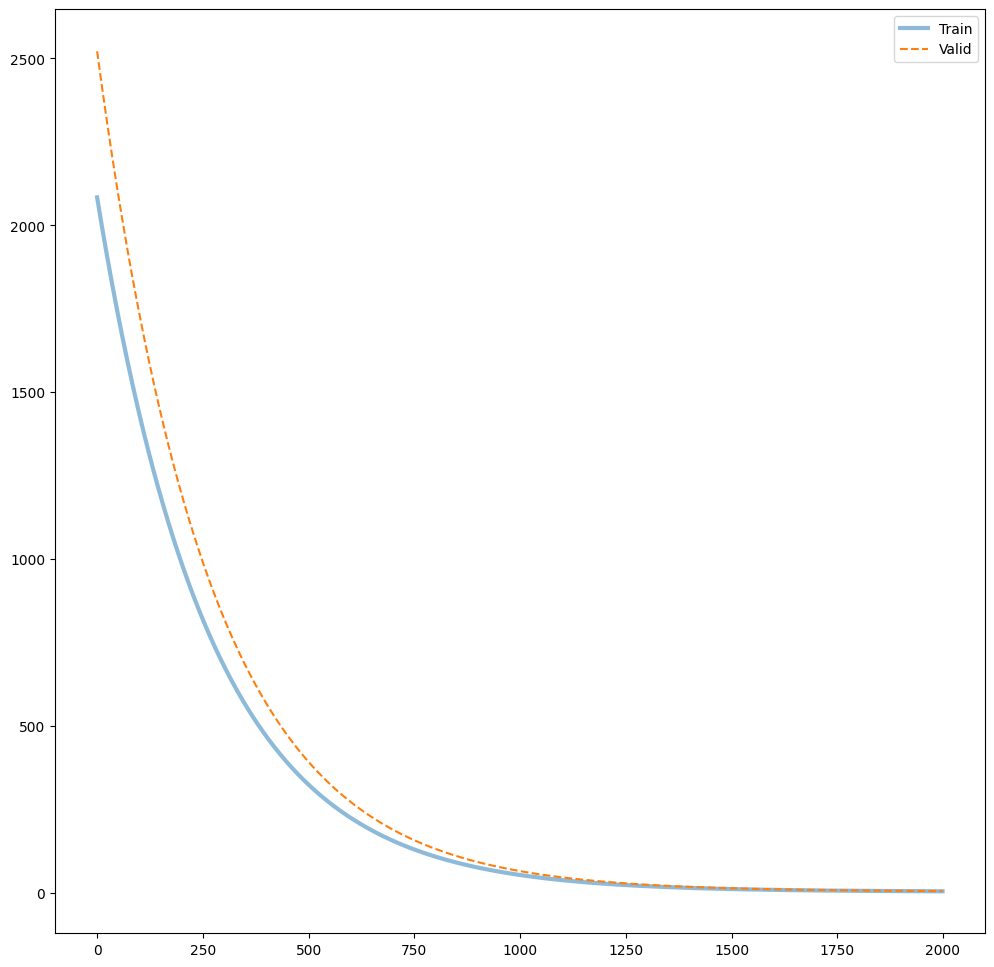

In [ ]:
EPOCHS_TO_SHOW = 2000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:EPOCHS_TO_SHOW], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:EPOCHS_TO_SHOW], ls='--', label='Valid')
ax.legend()

In [ ]:
lrm.weights

Parameter containing:
tensor([2.7642e-02, 4.1119e+01, 2.4042e+01], requires_grad=True)

Probably from those 3 values the non informative one would be 2.76e-2 because it is very small.

In [ ]:
lrm.bias

Parameter containing:
tensor([2.9828], requires_grad=True)

## The `Linear` layer


In [ ]:
class Linear(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.weights = nn.Parameter(torch.rand((dim_in, dim_out)))
        self.bias = nn.Parameter(torch.rand(dim_out))

    def forward(self, X):

        return X@self.weights + self.bias

In [ ]:
# Let's compare our Linear class with nn.Linear
l1 = Linear(3, 5)
l2 = nn.Linear(3, 5)

In [ ]:
l2.weight

Parameter containing:
tensor([[ 0.1886,  0.1492,  0.5384],
        [ 0.0403, -0.4265, -0.2608],
        [ 0.0991,  0.1419, -0.2289],
        [-0.1150,  0.1038,  0.3424],
        [ 0.2488,  0.3999,  0.1111]], requires_grad=True)

In [ ]:
l1.weights

Parameter containing:
tensor([[0.4410, 0.8451, 0.9386, 0.2268, 0.2387],
        [0.0922, 0.8826, 0.6945, 0.4205, 0.6682],
        [0.5470, 0.8287, 0.2375, 0.9911, 0.0060]], requires_grad=True)

If we want these layers to have the same outputs, we need to make sure the weights have the same values. If they don't, we can't expect them to have the same outputs. Let's assign the weights from the nn.Linear layer to our Linear layer. Note that when you see an underscore _ at the end of a tensor operation, that indicates modification of that tensor in place.

In [ ]:
l1.weights.data.copy_(l2.weight.T)
l1.bias.data.copy_(l2.bias)

tensor([ 0.4031,  0.2615, -0.5014,  0.5577, -0.3992], grad_fn=<CopyBackwards>)

In [ ]:
l1(X_train[:5])

tensor([[ 0.3410,  0.4532, -0.9054,  0.8192, -1.0375],
        [ 0.0652,  0.2131, -0.4075,  0.5046, -0.4824],
        [ 0.3973, -0.0080, -0.3574,  0.5757, -0.1389],
        [ 0.3482,  0.3261, -0.4425,  0.4696, -0.3719],
        [ 0.2782,  0.8437, -0.7548,  0.4687, -0.9740]], grad_fn=<AddBackward0>)

In [ ]:
l2(X_train[:5])

tensor([[ 0.3410,  0.4532, -0.9054,  0.8192, -1.0375],
        [ 0.0652,  0.2131, -0.4075,  0.5046, -0.4824],
        [ 0.3973, -0.0080, -0.3574,  0.5757, -0.1389],
        [ 0.3482,  0.3261, -0.4425,  0.4696, -0.3719],
        [ 0.2782,  0.8437, -0.7548,  0.4687, -0.9740]],
       grad_fn=<AddmmBackward0>)

In [ ]:
assert (l1(X_train[:5]) == l2(X_train[:5])).all()

Sometimes `torch`'s implementations with some optimizations that make operations run faster.
We'll see examples of this later in the course.
I was just curious to see whether `torch`'s implementation was significantly faster than ours using `%%timeit`.

In [ ]:
%%timeit
l1(X_train[:5])

21.5 µs ± 783 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
 l2(X_train[:5])

22.3 µs ± 540 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Nonlinearities (activation functions)

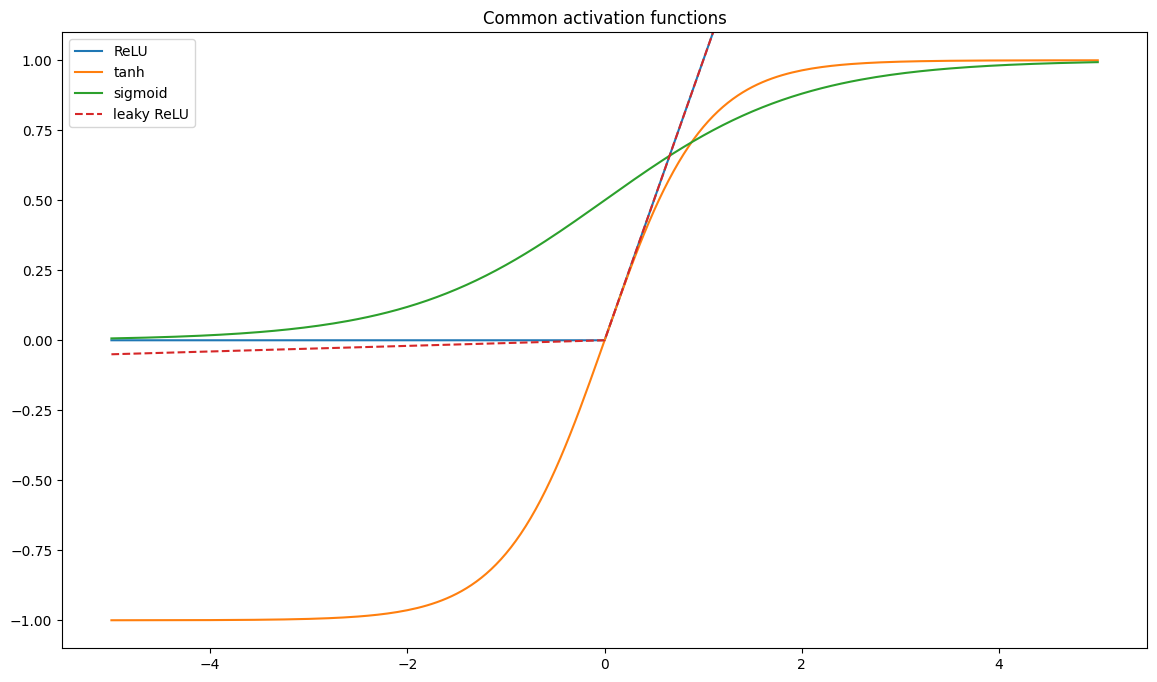

In [ ]:
rng = torch.arange(-5, 5.01, 0.05)
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(rng, F.relu(rng), label='ReLU')
ax.plot(rng, torch.tanh(rng), label='tanh')
ax.plot(rng, torch.sigmoid(rng), label='sigmoid')
ax.plot(rng, F.leaky_relu(rng, negative_slope=0.01), ls='--', label='leaky ReLU')
ax.set_ylim(-1.1, 1.1)
ax.set_title('Common activation functions')
ax.legend()

Nonlinearities (activation functions)

Up until this section, what we've done are a bunch of matrix multiplications. Matrix multiplications can only perform linear transformations of the data, like shearing, translation, rotation, reflection, and shearing. Without some method of adding non-linearities, we will only be able to learn linear transformations of the original data, which doesn't help us learn nonlinear patterns. Activation functions are nonlinearities you can add between layers that allow deep neural networks to learn any function. While we'll use different activations at different points during this course, a good rule of thumb is just use a rectified linear unit (F.relu, nn.ReLU) between layers.

Why are addining nonlinearities important? This youtube video from course.fast.ai gives some great intuition. Basically, if we don't add any nonlinearities between layers, we're no better off than having just 1 linear layer. Once we've added a hidden layer with nonlinearities, and if the weights matrices are big enough, we can approximate any continuous function! We'll learn more about why different activation functions help improve learning when we discuss the vanishing and exploding gradient problems.

The figure below illustrates some of the most common activation functions. The X-axis represents the input to the activation function, and the Y-axis is the output.

## Exercise 2.7: Explore our neural network

In this exercise, use the code below to explore different aspects of our nerual netowrk.
For each of the following scenarios, inspect the plots of the train/validaiton loss at the end of the notebook and record what happens with each experient you do.
Try to...
* Switch out `nn.Linear` for the `Linear` class we defined earlier. Do these networks learn differently?
* What happens if if we use `MultiLayerRegressor` (the subclassing API) vs. the `multilayer_regressor` function (the sequential API)? Are these equivalent?
* What happens as you increase the `hiiden_dim`?
* Remove the nonlinearity. Does your network learn as well?
* Try adding at least 1 layer in between the input and output layers of the network, with a nonlinearity. **NOTE:** Since we're learning a really simple function, additional layers may not help our loss.

In [ ]:
class MultiLayerRegressor(nn.Module):
    def __init__(self, dim_in, hidden_dim):
        super().__init__()
        # self.first_layer = Linear(dim_in, hidden_dim)
        self.first_layer = nn.Linear(dim_in, hidden_dim)
        # self.second_layer = Linear(hidden_dim, 1)
        self.second_layer = nn.Linear(hidden_dim, 1)

    def forward(self, X):
        x = self.first_layer(X)
        # x = relu(x)
        x = F.relu(x)
        x = self.second_layer(x)
        return x

If your neural network is simple. This allows you easily to do it

In [ ]:
def multilayer_regressor(in_dim, hidden_dim):
    return nn.Sequential(
        nn.Linear(in_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, 1)
    )

In [ ]:
# mlr = MultiLayerRegressor(3, 4)
mlr = multilayer_regressor(3, 4)

In [ ]:
train_losses = []
valid_losses = []

In [ ]:
LR = 1e-3
N_EPOCHS = 20000

In [ ]:
# Notice that instead of iterating through our parameters and applying
# an update rule, we're just using torch's built in SGD optimizer.
opt = optim.SGD(mlr.parameters(), lr=LR)

In [ ]:
for i in range(N_EPOCHS):
    yhat = mlr(X_train).squeeze()
    loss = F.mse_loss(yhat, y_train)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_losses.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = mlr(X_valid).squeeze()
        valid_loss = F.mse_loss(yhat, y_valid)
        valid_losses.append(loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train loss: {loss:.04f}, Valid loss: {valid_loss:.04f}")

Epoch 0 Train loss: 2138.3174, Valid loss: 2584.8296
Epoch 2000 Train loss: 225.1916, Valid loss: 276.2177
Epoch 4000 Train loss: 116.2605, Valid loss: 142.8245
Epoch 6000 Train loss: 76.1198, Valid loss: 86.5381
Epoch 8000 Train loss: 55.6425, Valid loss: 56.9947
Epoch 10000 Train loss: 43.4733, Valid loss: 39.5797
Epoch 12000 Train loss: 35.6449, Valid loss: 28.6975
Epoch 14000 Train loss: 30.1989, Valid loss: 21.4208
Epoch 16000 Train loss: 26.1232, Valid loss: 16.4044
Epoch 18000 Train loss: 22.9463, Valid loss: 12.8530


As long as your validation score continues going down you should keep on training but when it is topped stop it because you will overfit

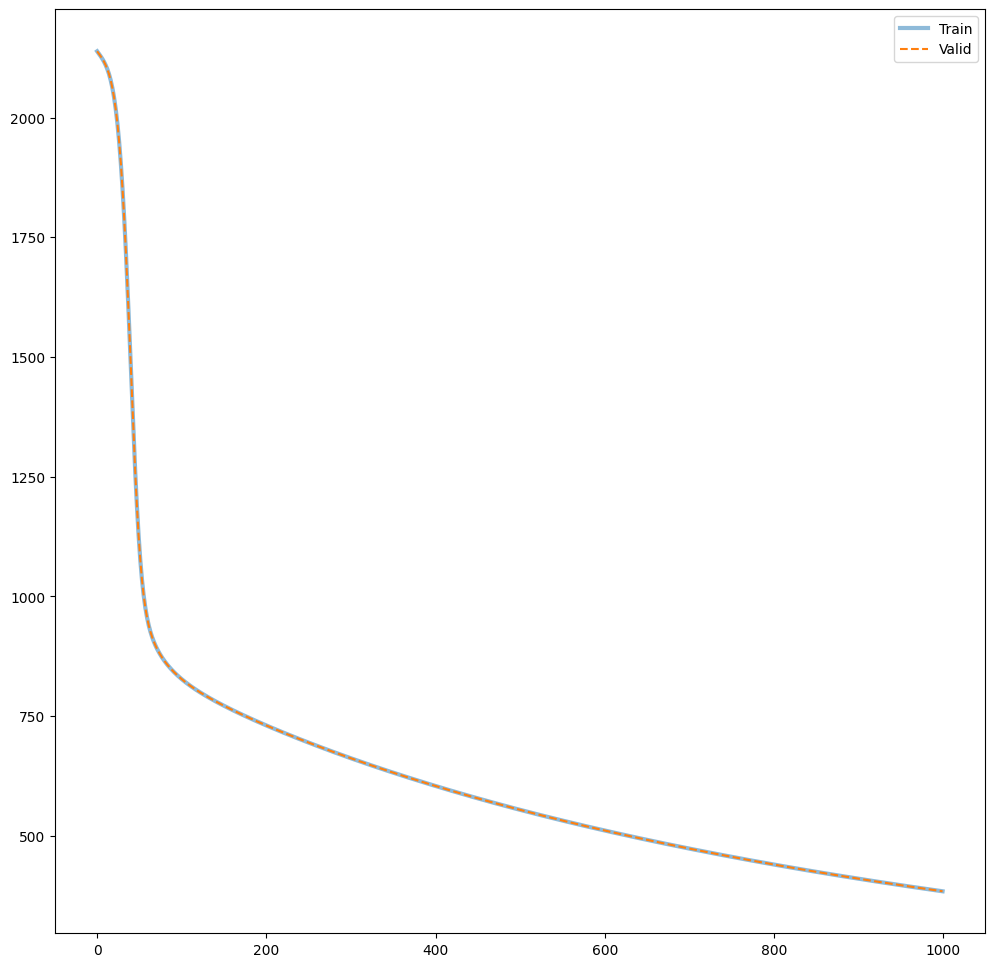

In [ ]:
idx=1000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:idx], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:idx], ls='--', label='Valid')
ax.legend()

Notice that the multilayer regressor converged (i.e. found a loss minimum) between 80 and 100 epochs. If you take a look above at our single-layer regressor, it took between 1000 and 2000 passes through the data to converge. Adding additional layers and nonlinearities allowed us to learn the data in fewer passes.

In [ ]:
#Voy a probar una red con 3 capas a aver que sale
def multilayer_regressor2(in_dim, hidden_dim):
    return nn.Sequential(
        nn.Linear(in_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim,hidden_dim),
        nn.ReLu(),
        nn.Linear(hidden_dim, 1)
    )

In [ ]:
mlr2 = multilayer_regressor(3, 4)

In [ ]:
train_losses2=[]
valid_losses2=[]

In [ ]:
LR = 1e-3
N_EPOCHS = 20000

In [ ]:
# Notice that instead of iterating through our parameters and applying
# an update rule, we're just using torch's built in SGD optimizer.
opt = optim.SGD(mlr2.parameters(), lr=LR)

In [ ]:
for i in range(N_EPOCHS):
    yhat = mlr2(X_train).squeeze()
    loss = F.mse_loss(yhat, y_train)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_losses2.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = mlr2(X_valid).squeeze()
        valid_loss = F.mse_loss(yhat, y_valid)
        valid_losses2.append(loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train loss: {loss:.04f}, Valid loss: {valid_loss:.04f}")

Epoch 0 Train loss: 4.1188, Valid loss: 4.1239
Epoch 2000 Train loss: 4.1188, Valid loss: 4.1245
Epoch 4000 Train loss: 4.1187, Valid loss: 4.1250
Epoch 6000 Train loss: 4.1187, Valid loss: 4.1255
Epoch 8000 Train loss: 4.1186, Valid loss: 4.1260
Epoch 10000 Train loss: 4.1185, Valid loss: 4.1265
Epoch 12000 Train loss: 4.1185, Valid loss: 4.1269
Epoch 14000 Train loss: 4.1184, Valid loss: 4.1274
Epoch 16000 Train loss: 4.1184, Valid loss: 4.1278
Epoch 18000 Train loss: 4.1184, Valid loss: 4.1282


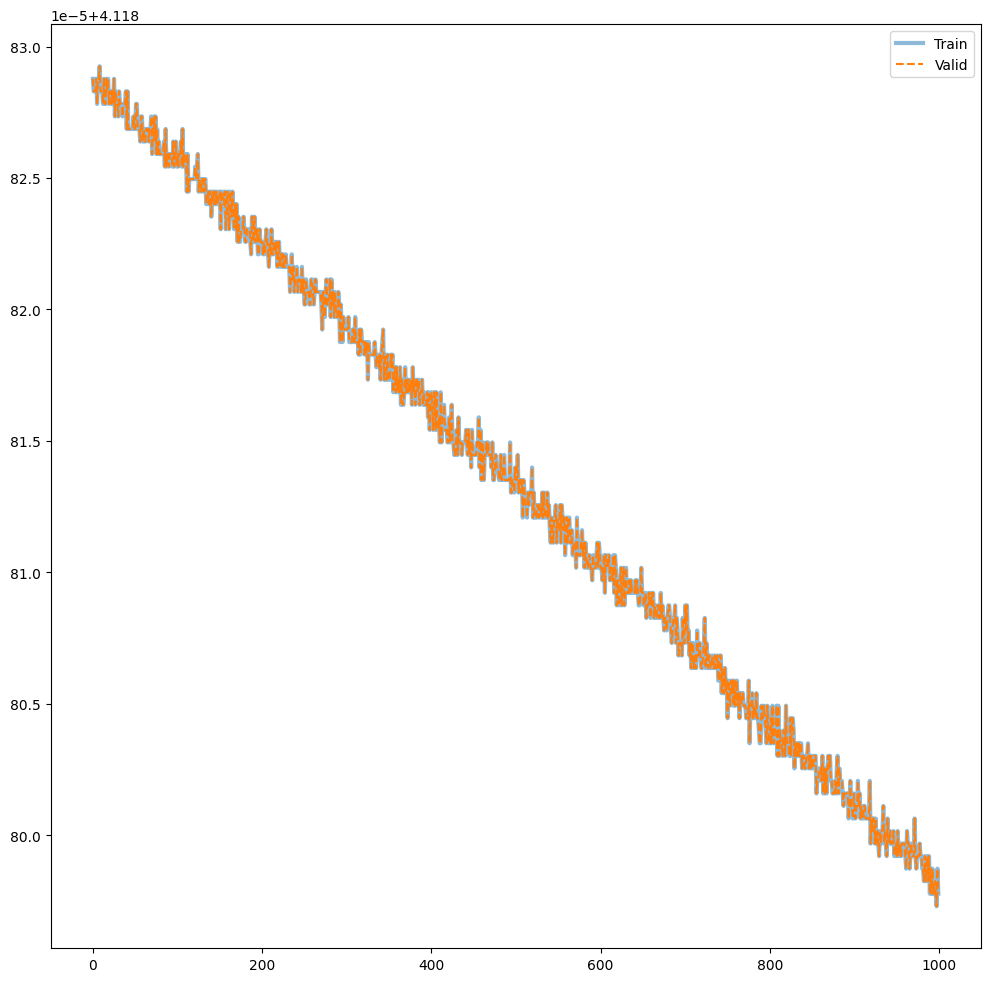

In [ ]:
idx=1000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses2[:idx], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses2[:idx], ls='--', label='Valid')
ax.legend()

if you check the scale it`s 1e-5+4.118. So seems that it`s a a really small value in y

I should check if i re-run it several times before i changed train_losses2 but check it again

In [ ]:
#Now let`s try the class to see how to run it

mlr3 = MultiLayerRegressor(3, 4)

In [ ]:
train_losses1=[]
valid_losses1=[]

In [ ]:
LR = 1e-3
N_EPOCHS = 20000

In [ ]:
# Notice that instead of iterating through our parameters and applying
# an update rule, we're just using torch's built in SGD optimizer.
opt = optim.SGD(mlr3.parameters(), lr=LR)

In [ ]:
for i in range(N_EPOCHS):
    yhat = mlr3(X_train).squeeze()
    loss = F.mse_loss(yhat, y_train)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_losses1.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = mlr3(X_valid).squeeze()
        valid_loss = F.mse_loss(yhat, y_valid)
        valid_losses1.append(loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train loss: {loss:.04f}, Valid loss: {valid_loss:.04f}")

Epoch 0 Train loss: 2141.5752, Valid loss: 2590.1282
Epoch 2000 Train loss: 4.1096, Valid loss: 4.1490
Epoch 4000 Train loss: 4.1008, Valid loss: 4.1469
Epoch 6000 Train loss: 4.1003, Valid loss: 4.1455
Epoch 8000 Train loss: 4.0970, Valid loss: 4.1414
Epoch 10000 Train loss: 4.0958, Valid loss: 4.1396
Epoch 12000 Train loss: 4.0952, Valid loss: 4.1383
Epoch 14000 Train loss: 4.0950, Valid loss: 4.1377
Epoch 16000 Train loss: 4.0949, Valid loss: 4.1377
Epoch 18000 Train loss: 4.0948, Valid loss: 4.1377


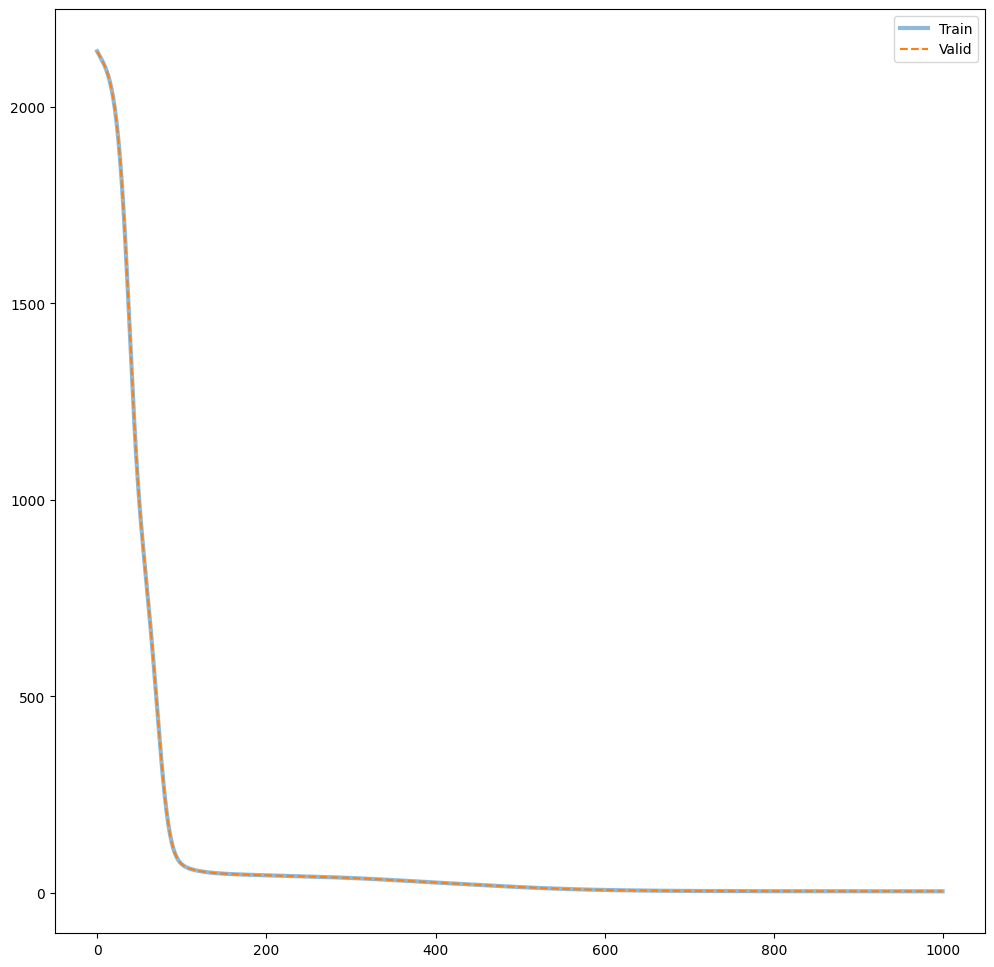

In [ ]:
idx=1000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses1[:idx], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses1[:idx], ls='--', label='Valid')
ax.legend()

as we can see the result is the same as using the function